# k-Nearest Neighbor (K-NN) Classifier (with numerical values)

## import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [2]:
# from google.colab import files
# uploaded = files.upload()
# D9data2.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [3]:
dataset = pd.read_csv('D9data2.csv')
dataset.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [4]:
dataset.shape

(400, 4)

In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


## EDA

### null check

In [7]:
dataset.isnull().sum()
# null check

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### countplot

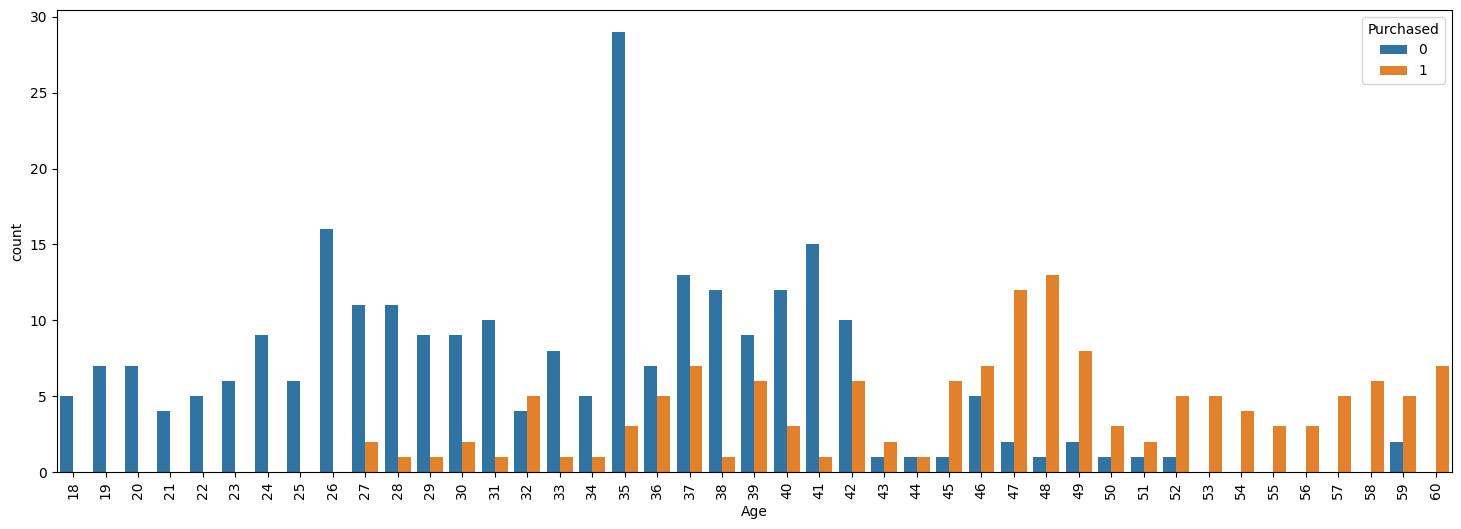

In [8]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='Age', hue='Purchased', data=dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## identify X & Y

In [9]:
# x = dataset.iloc[:, 1:-1].values
# kiran's Predictors, she wanted to show
x = dataset.iloc[:, 1:-1].values
# removing UserID as it has unique values & does not have any relation
# which will drop accuracy
# independent vars
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [10]:
y = dataset.iloc[:, -1].values
# dependent vars
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

## splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
x_train[:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [14]:
y_train[:5]

array([1, 0, 0, 0, 1], dtype=int64)

## Preprocessing

### Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
# creating StandardScaler object

In [17]:
x_train = sc.fit_transform(x_train)
# scaling x_train
x_train[:5]
# cross-cecking scaled x_train

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [18]:
x_test = sc.fit_transform(x_test)
# scaling x_test
x_test[:5]
# cross-cecking scaled x_test

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674]])

## Modeling

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

## Training

In [21]:
classifier.fit(x_train, y_train)
# trainiing stage
# but no actual training takes place
# because K-NN is lazy learner
# so unless test data is provided, it does not learn anything

KNeighborsClassifier()

## Prediction

In [22]:
classifier.predict(sc.transform([[30, 89000]]))
# generating prediction with custom test values,
# but we need to scale these values, as training data was also scaled

array([1], dtype=int64)

In [23]:
y_pred = classifier.predict(x_test)
# generating prediction, with testing data,
# but we do not need to scale these values,
# as testing data is already scaled
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [24]:
y_test[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [25]:
np.concatenate( (y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)) , 1)[:5]
# to see ypred & y_test values side-by-side

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

## Model evaluation

### confusion_matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_pred, y_test)

array([[54,  1],
       [ 4, 21]], dtype=int64)

### classification_report

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.95      0.84      0.89        25

    accuracy                           0.94        80
   macro avg       0.94      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80



### accuracy_score

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_pred, y_test)

0.9375

### precision_score

In [32]:
from sklearn.metrics import precision_score

In [33]:
precision_score(y_pred, y_test)

0.9545454545454546

### recall_score

In [34]:
from sklearn.metrics import recall_score

In [35]:
recall_score(y_pred, y_test)

0.84

## Visualization

In [36]:
from matplotlib.colors import ListedColormap

C:\Users\surya\AppData\Local\Temp\ipykernel_33276\3502108257.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


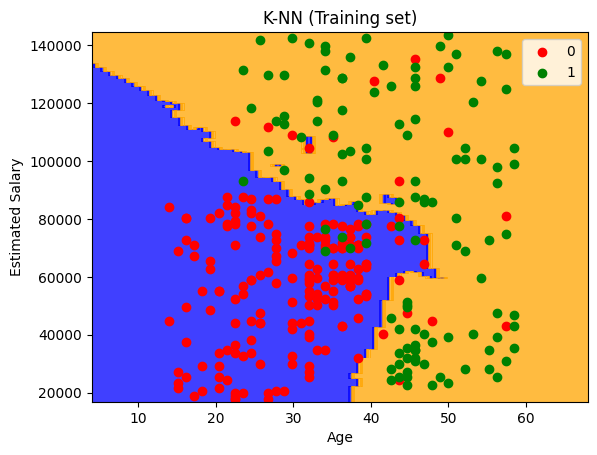

In [37]:
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# k-Nearest Neighbor (K-NN) Classifier (with categorical values)

## Assigning features and label variables

In [38]:
### First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

In [39]:
### Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

In [40]:
### Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

## Preprocessing

### Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
la = LabelEncoder()
# creatig label encoder object
# to convert string labels into numbers

#### encoding predictors

In [43]:
w_encode = la.fit_transform(weather)
# fitting & transforming with label encoding
w_encode

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1], dtype=int64)

In [44]:
t_encode = la.fit_transform(temp)
# fitting & transforming with label encoding
t_encode

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2], dtype=int64)

#### encoding target

In [45]:
p_encode = la.fit_transform(play)
# fitting & transforming with label encoding
p_encode

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

### Combining Predictor Columns: zip()

In [46]:
features = list(zip(w_encode, t_encode))
# converting output of zip into list
features[:5]

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0)]

## Modeling

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model = KNeighborsClassifier(n_neighbors=3)
# creating model

## Training

In [49]:
model.fit(features, p_encode)
# training model

KNeighborsClassifier(n_neighbors=3)

## Prediction

In [50]:
predict = model.predict([[0, 2]])
# 0 : Overcast
# 1: Mild
predict
# predit 1 : Play Yes

array([1], dtype=int64)

In [51]:
predict = model.predict([[0, 0]])
predict

array([1], dtype=int64)

In [52]:
predict = model.predict([[2, 2]])
predict

array([0], dtype=int64)

# Interview Questions
1. What is K-NN algorithm?
2. How does K-NN algorithm work?
3. Why K-NN is a non-parametric algorithm?
4. Is there a need of feature scaling in K-NN algorthm?
5. Can the K-NN algorithm used to solve regession problems?
6. Why is K-NN algorithm considered as a Lazy Learner algorithm?
7. How the categorical variables be handled in the K-NN algorithm?
8. How can the Bias - Variance Tradeoff be related to the K-NN algorithm ?
9. What is the role of ```k``` value in the K-NN algorithm?
10. How to choose the optimal vlaue of ```k``` in K-NN algorithm?

# Interview Questions' solutions
1. What is K-NN algorithm?           
    The k-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm that is commonly used for both classification and regression tasks. It is a simple yet powerful algorithm that makes predictions based on the similarity of a new data point to its k nearest neighbors in the training dataset.

2. How does K-NN algorithm work?    
The KNN algorithm works in the following way:       
    For each new data point to be classified, the algorithm calculates its distance (e.g., Euclidean distance) to all other data points in the training set.
    It then selects the k nearest neighbors based on the smallest distances.
    In the case of classification, the algorithm assigns the class label that is most frequent among the k nearest neighbors to the new data point.
    For regression problems, the algorithm takes the average (or weighted average) of the target values of the k nearest neighbors as the predicted value for the new data point.

3. Why K-NN is a non-parametric algorithm?   
    KNN is considered a non-parametric algorithm because it does not make any assumptions about the underlying distribution of the data or the relationship between the features and the target variable. It does not estimate or learn parameters from the training data but instead uses all available training instances as the representation of the decision boundary.

4. Is there a need of feature scaling in K-NN algorthm?     
    Feature scaling is important in KNN because the algorithm relies on the distances between data points to make predictions. If the features are on different scales, those with larger values will dominate the distance calculations. Therefore, it is generally recommended to perform feature scaling (e.g., normalization or standardization) before applying the KNN algorithm to ensure that all features contribute equally to the distance calculations.

5. Can the K-NN algorithm used to solve regession problems?    
    Yes, the KNN algorithm can be used for regression problems. In regression, instead of assigning class labels, KNN predicts a continuous value by taking the average or weighted average of the target values of the k nearest neighbors. For example, if k=5, it would take the average of the target values of the 5 nearest neighbors as the predicted value.

6. Why is K-NN algorithm considered as a Lazy Learner algorithm?        
    The KNN algorithm is considered a "lazy learner" because it does not build a model during the training phase. Instead, it memorizes the entire training dataset and makes predictions at runtime based on the most similar instances to the new data point. This lazy approach allows KNN to have low training time but relatively higher prediction time, as it needs to compute distances and search for neighbors for each new instance.

7. How the categorical variables be handled in the K-NN algorithm?      
    Categorical variables can be handled in the KNN algorithm by converting them into numerical values. One common approach is to use one-hot encoding, where each category is represented by a binary feature. For example, if a categorical variable has three categories (A, B, C), it can be transformed into three binary features: IsCategoryA, IsCategoryB, and IsCategoryC. These binary features can then be used along with the numerical features to calculate the distances between data points.

8. How can the Bias - Variance Tradeoff be related to the K-NN algorithm ?       
    The bias-variance tradeoff is relevant to the KNN algorithm. A smaller value of k leads to low bias but high variance, meaning the model will be highly influenced by the noise in the training data and may overfit. On the other hand, a larger value of k leads to higher bias but lower variance, resulting in a smoother decision boundary but potentially underfitting the data. The choice of the optimal k value can help strike a balance between bias and variance in the KNN algorithm.

9. What is the role of ```k``` value in the K-NN algorithm?     
    The k value in the KNN algorithm represents the number of nearest neighbors to consider for making predictions. It is an important hyperparameter that needs to be determined before applying the algorithm. A small k value will result in a more flexible decision boundary with potentially more complex patterns captured but is more sensitive to noise. A large k value will provide a smoother decision boundary but may overlook local patterns or introduce bias. The choice of k depends on the data and problem at hand.

10. How to choose the optimal vlaue of ```k``` in K-NN algorithm?
    Choosing the optimal value of k in KNN can be done through a process called hyperparameter tuning. One common approach is to use cross-validation, where the training data is split into multiple subsets, and each subset is used as a validation set in turn. The performance of the KNN algorithm is evaluated using different k values, and the one that yields the best performance metric (e.g., accuracy or mean squared error) on the validation sets is chosen as the optimal value of k. Other techniques, such as grid search or random search, can also be used to explore a range of k values and find the best one.